### VLM Tests
* [Omitting title, rendering LaTeX, truncating $2 \leq \ell \leq 2500$ to $2 \leq \ell \leq 100$](#first-test)
* [Injecting incorrect Planck 2018 cosmological parameters](#second-test)

### VLM test: omitting title, rendering LaTeX, truncating $2 \leq \ell \leq 2500$ to $2 \leq \ell \leq 100$ <a class="anchor" id="first-test"></a>

TLDR: plot judge (gemini-2.5-flash) recommends extending the x-axis range, adding a title, and modifying the y-axis label to be in plain text and avoid LaTeX.

In [ ]:
import cmbagent

result = cmbagent.one_shot(
    task= r"""
Use the CLASS cosmology code (via classy) to compute the CMB TT power spectrum for Planck 2018 LCDM parameters. 

Plot the lensed TT spectrum for 2 <= l <= 2500.

Here's a general outline to follow:

# Imports

# Create instance of the class "Class"

# Pass LambdaCDM input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# Run class

# Get all C_l output

# Plotting
""",    
    agent="engineer",
    evaluate_plots=True,
    max_n_plot_evals=2
)


Use the CLASS cosmology code (via classy) to compute the CMB TT power spectrum for Planck 2018 LCDM parameters. 

Plot the lensed TT spectrum for 2 <= l <= 2500.

Here's a general outline to follow:

# Imports

# Create instance of the class "Class"

# Pass LambdaCDM input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# Run class

# Get all C_l output

# Plotting


--------------------------------------------------------------------------------

Calling engineer...

             Model    agent    Cost  Prompt Tokens  Completion Tokens  Total Tokens
gpt-4.1-2025-04-14 engineer 0.01112           1938                906          2844
**Code Explanation:**

This code uses the CLASS cosmology code (via the `classy` Python interface) to compute the lensed CMB TT power spectrum for Planck 2018 LCDM parameters. It sets up

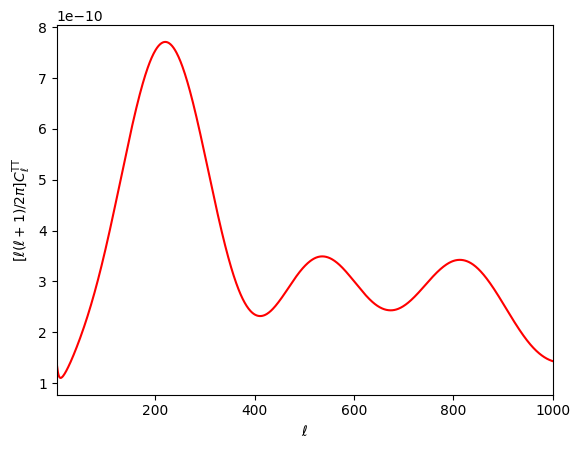

In [2]:
# https://github.com/lesgourg/class_public/blob/master/notebooks/warmup.ipynb

from classy import Class
import matplotlib.pyplot as plt
from math import pi

# Create instance of the class "Class"
LambdaCDM = Class()

# Pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# Run class
LambdaCDM.compute()

# get all C_l output
cls = LambdaCDM.lensed_cl(1000)
ll = cls['ell'][2:]
clTT = cls['tt'][2:]

plt.xscale('linear')
plt.yscale('linear')
plt.xlim(2,1000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')
plt.show()

### VLM test: injecting incorrect Planck 2018 cosmological parameters <a class="anchor" id="second-test"></a>

TLDR: plot judge (o3) immediately recognizes that the curve is scientifically incorrect, commenting on the scale and shape of the acoustic peaks. 

In [1]:
import cmbagent

result = cmbagent.one_shot(
    task= r"""
Use the CLASS cosmology code (via classy) to compute the CMB TT power spectrum for Planck 2018 LCDM parameters. 

Plot the lensed TT spectrum for 2 <= l <= 2500.

Here's a general outline to follow:

# Imports

# Create instance of the class "Class"

# Pass LambdaCDM input parameters
LambdaCDM.set({'omega_b':___,'omega_cdm':___,'h':___,'A_s':___,'n_s':___,'tau_reio':___})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':___})

# Run class

# Get all C_l output

# Plotting
""",    
    agent="engineer",
    evaluate_plots=True,
    max_n_plot_evals=1,
)


Use the CLASS cosmology code (via classy) to compute the CMB TT power spectrum for Planck 2018 LCDM parameters. 

Plot the lensed TT spectrum for 2 <= l <= 2500.

Here's a general outline to follow:

# Imports

# Create instance of the class "Class"

# Pass LambdaCDM input parameters
LambdaCDM.set({'omega_b':___,'omega_cdm':___,'h':___,'A_s':___,'n_s':___,'tau_reio':___})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':___})

# Run class

# Get all C_l output

# Plotting


--------------------------------------------------------------------------------

Calling engineer...

             Model    agent    Cost  Prompt Tokens  Completion Tokens  Total Tokens
gpt-4.1-2025-04-14 engineer 0.01074           1884                872          2756
**Code Explanation:**

This code uses the CLASS cosmology code (via the `classy` Python interface) to compute the lensed CMB TT power spectrum for Planck 2018 LCDM parameters. It sets up the cosmological parameters, runs the

* We project acoustic pattern onto very large angles, so peak structure collapses into the first few multipoles
* TT power-spectrum plot shifts to the left and inflates on the largest scales

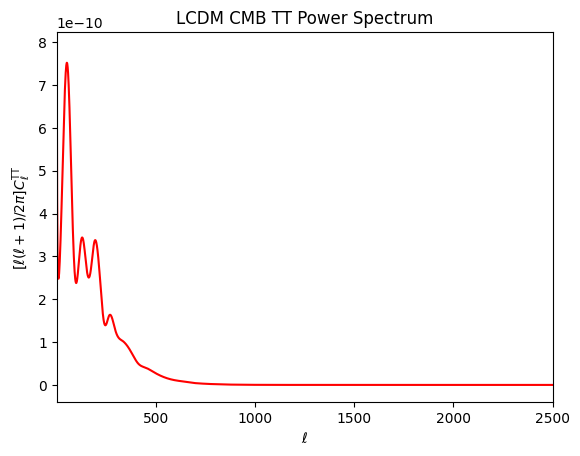

In [7]:
from classy import Class
import matplotlib.pyplot as plt
from math import pi

# Create instance of the class "Class"
LambdaCDM = Class()

# Pass input parameters                                   ↓ ERROR ↓                      
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':67.810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# Run class
LambdaCDM.compute()

# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
ll = cls['ell'][2:]
clTT = cls['tt'][2:]

plt.xscale('linear')
plt.yscale('linear')
plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.title("LCDM CMB TT Power Spectrum")
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')
plt.show()